In [19]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
import seq2seq_model
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, Bidirectional, Add, LSTM, Flatten, Dropout
from tensorflow import keras
import tensorflow as tf



In [20]:
df = pd.read_csv('2249345v4423910.csv', index_col=0)
df

,ltp odds,r1 spread,r1 pup,r2 spread,r2 pup,enhanced_markov,markov_odds,r1_0,r1_1,r1_2,r1_3,r2_0,r2_1,r2_2,r2_3
2018-07-07 10:36:10,0.424641,0.093909,0.409607,0.019749,0.484152,0.883068,0.423074,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2018-07-07 10:36:15,0.424423,0.093909,0.409607,0.019749,0.484152,0.883068,0.423074,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2018-07-07 10:36:20,0.424206,0.093909,0.409607,0.019749,0.484152,0.883068,0.423074,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2018-07-07 10:36:25,0.423989,0.093909,0.409607,0.019749,0.484152,0.883068,0.423074,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2018-07-07 10:36:30,0.423772,0.093909,0.409607,0.019749,0.484152,0.883068,0.423074,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-07 13:42:02,1.000000,0.008965,0.737546,0.594928,0.384681,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-07-07 13:42:05,1.000000,0.008965,0.737546,0.594928,0.384681,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-07-07 13:42:07,1.000000,0.008965,0.737546,0.594928,0.384681,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-07-07 13:42:10,1.000000,0.008965,0.737546,0.594928,0.384681,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
data = df.to_numpy()
data

array([[0.4246405 , 0.09390895, 0.40960749, ..., 0.        , 0.        ,
        1.        ],
       [0.42442341, 0.09390895, 0.40960749, ..., 0.        , 0.        ,
        1.        ],
       [0.42420631, 0.09390895, 0.40960749, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.00896503, 0.73754648, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.00896503, 0.73754648, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.00896503, 0.73754648, ..., 0.        , 1.        ,
        0.        ]])

In [22]:
train_temp, test = train_test_split(data, test_size=0.8, shuffle=False)
train, val = train_test_split(train_temp, test_size=0.2, shuffle=False)
# train_x, train_y = seq2seq_model.truncate_data(data, 60 * 3, 60)
# train = data[: 60 * 8, :]
# test = data[60 * 8 :, :]
print(test.shape, train.shape)
# print(train_x[2,:,0])
# print(train_y[2,:,0])

(1845, 15) (368, 15)


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 75, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 75, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 16)                3216      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 485,633
Trainable params: 485,633
Non-trainab

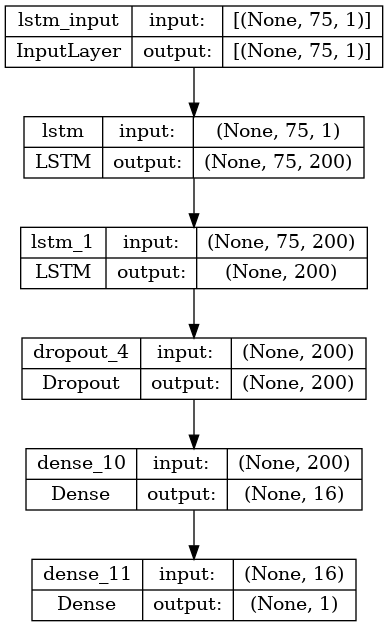

In [23]:
model = load_model("transfer_lstm_model")
model.summary()
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True)

In [24]:
# score, scores, actual, predicted = seq2seq_model.evaluate_model(model, train, test, 3, 36, features_out=range(1), features=range(1), features_in_num=1, features_out_num=1, initial_epochs=100, epochs=2, batches_to_train=100000)
window = 75
val_x, val_y = seq2seq_model.truncate_single_step(train, window, features_in=range(1), features_out=range(1))
results = model.evaluate(val_x, val_y)
preds = model.predict(val_x)

10/10 [==============================] - 0s 4ms/step


RMSE:  0.016868135816203386
MAE:  0.01265107560902834


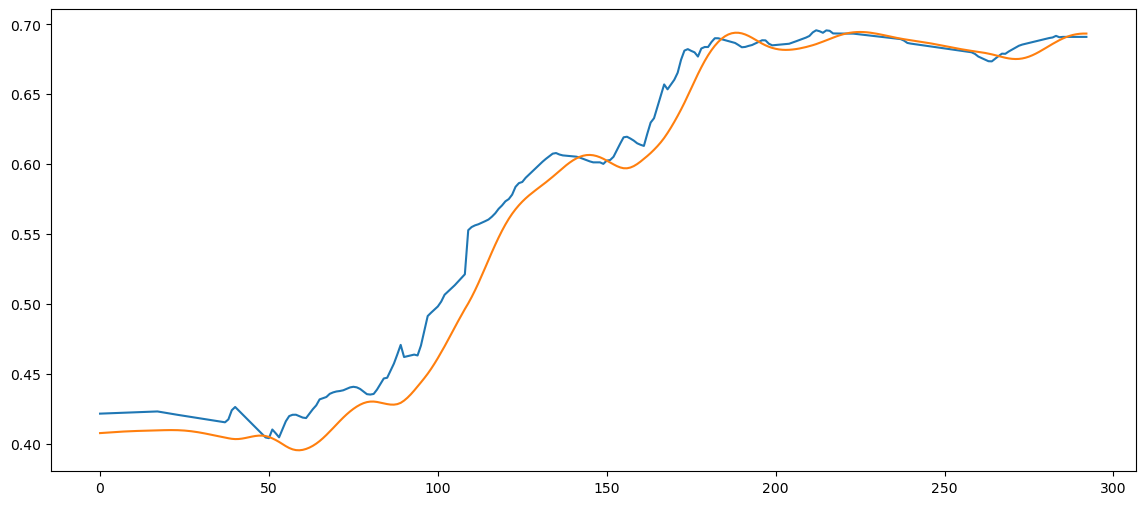

In [25]:
plt.figure(figsize=(14,6))
plt.plot(val_y[:,0])
plt.plot(preds[:,0])
print('RMSE: ', np.sqrt(results[0]))
print('MAE: ', results[1])

In [26]:
train_x, train_y = seq2seq_model.truncate_single_step(train_temp, n_steps=window, features_in=range(1), features_out=range(1))
val_x, val_y = seq2seq_model.truncate_single_step(val, window, features_in=range(1), features_out=range(1))
features_out_num = train_y.shape[1]
print(val_x.shape, val_y.shape)
print(val.shape)
print(train_x.shape, train_y.shape)
x = model.get_layer('lstm_1').output
# x = Dropout(0.2)(x)
x = Dense(16, activation='elu')(x)
x = Dense(features_out_num, activation='sigmoid')(x)
model = keras.models.Model(inputs=model.input, outputs=x)

# x = model.get_layer('bidirectional').output
# y = model.get_layer('bidirectional_1').output
# bd_out_1 = Bidirectional(LSTM(features_out_num, activation='linear'), merge_mode='sum')(x)
# bd_out_2 = Bidirectional(LSTM(features_out_num, activation='tanh'), merge_mode='sum')(y)
# model_out = Add()([bd_out_1, bd_out_2])
# model = keras.models.Model(inputs=model.input, outputs=model_out)

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=opt, metrics=['mae'])
# print(model.get_layer('lstm').get_weights())
history = model.fit(train_x, train_y, epochs=25, batch_size=25, verbose=1)

(18, 75, 1) (18, 1)
(93, 15)
(386, 75, 1) (386, 1)
Epoch 1/25
16/16 [==============================] - 2s 10ms/step - loss: 0.0040 - mae: 0.0487
Epoch 2/25
16/16 [==============================] - 0s 10ms/step - loss: 5.2791e-04 - mae: 0.0188
Epoch 3/25
16/16 [==============================] - 0s 10ms/step - loss: 3.0153e-04 - mae: 0.0130
Epoch 4/25
16/16 [==============================] - 0s 10ms/step - loss: 2.4310e-04 - mae: 0.0114
Epoch 5/25
16/16 [==============================] - 0s 10ms/step - loss: 2.3663e-04 - mae: 0.0109
Epoch 6/25
16/16 [==============================] - 0s 10ms/step - loss: 2.2509e-04 - mae: 0.0106
Epoch 7/25
16/16 [==============================] - 0s 10ms/step - loss: 2.3024e-04 - mae: 0.0112
Epoch 8/25
16/16 [==============================] - 0s 10ms/step - loss: 2.2948e-04 - mae: 0.0109
Epoch 9/25
16/16 [==============================] - 0s 10ms/step - loss: 2.2765e-04 - mae: 0.0113
Epoch 10/25
16/16 [==============================] - 0s 10ms/step - los

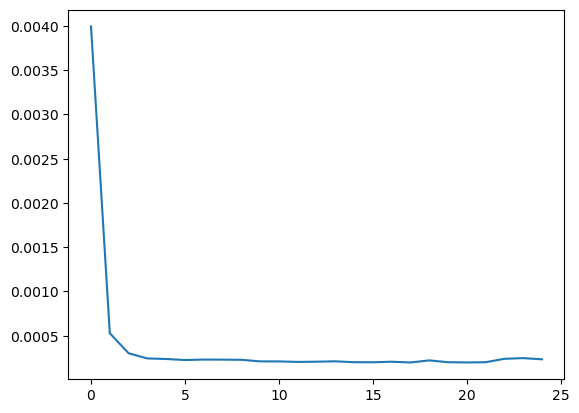

In [27]:
plt.plot(history.history['loss'])

In [28]:
test_x, test_y = seq2seq_model.truncate_single_step(test, window, features_in=range(1), features_out=range(1))
results = model.evaluate(test_x, test_y)
preds = model.predict(test_x)

56/56 [==============================] - 0s 3ms/step


(1770, 1)
RMSE:  0.06527357907853447
MAE:  0.04558172449469566


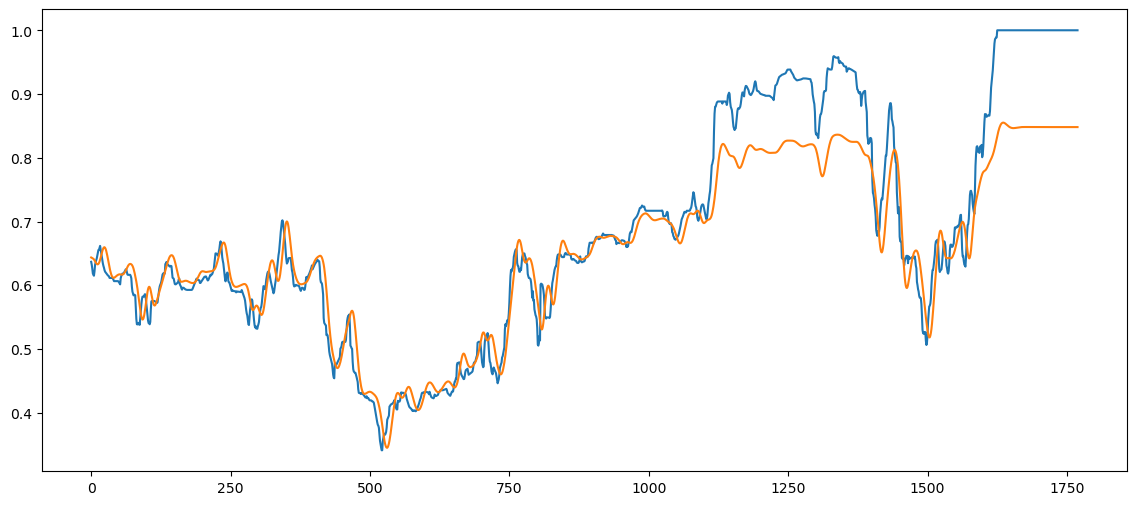

In [29]:
plt.figure(figsize=(14,6))
plt.plot(test_y[:,0])
plt.plot(preds[:,0])
print(preds.shape)
print('RMSE: ', np.sqrt(results[0]))
print('MAE: ', results[1])

In [30]:
train, test = train_test_split(data, test_size=0.7, shuffle=False)
test_x, test_y = seq2seq_model.truncate_single_step(test, window, features_in=range(1), features_out=range(1))
forecasts = []
i = 0
forecast_window = 36
while i * forecast_window < test_x.shape[0]:
    pred_x_temp = test_x[forecast_window * i, :, :]
    pred_y_temp = test_y[forecast_window * i, :]
    pred_x = pred_x_temp.reshape((1, window, pred_x_temp.shape[1]))
    y_future = []
    for k in range(forecast_window):
        pred_y = model.predict(pred_x)
        y_future.append(pred_y)
        pred_x = np.append(pred_x[:, 1:, :], pred_y.reshape(1, 1, 1), axis=1)
    forecasts.append(y_future)
    pred_x_temp = pred_x_temp.reshape((1, window, test_x.shape[2]))
    pred_y_temp = pred_y_temp.reshape((1, 1))
    train_x = np.vstack((train_x, pred_x_temp))
    train_y = np.vstack((train_y, pred_y_temp))
    i += 1
    if i % 5 == 0:
        model.reset_states()
        model.fit(train_x, train_y, epochs=10, batch_size=25, verbose=1)

1/1 [==============================] - 0s 11ms/step
Epoch 1/10
16/16 [==============================] - 0s 10ms/step - loss: 2.1015e-04 - mae: 0.0104
Epoch 2/10
16/16 [==============================] - 0s 10ms/step - loss: 1.8963e-04 - mae: 0.0096
Epoch 3/10
16/16 [==============================] - 0s 10ms/step - loss: 1.9719e-04 - mae: 0.0102
Epoch 4/10
16/16 [==============================] - 0s 10ms/step - loss: 2.1218e-04 - mae: 0.0109
Epoch 5/10
16/16 [==============================] - 0s 11ms/step - loss: 2.1128e-04 - mae: 0.0108
Epoch 6/10
16/16 [==============================] - 0s 10ms/step - loss: 2.2507e-04 - mae: 0.0111
Epoch 7/10
16/16 [==============================] - 0s 10ms/step - loss: 1.8461e-04 - mae: 0.0096
Epoch 8/10
16/16 [==============================] - 0s 10ms/step - loss: 1.8357e-04 - mae: 0.0095
Epoch 9/10
16/16 [==============================] - 0s 10ms/step - loss: 1.8588e-04 - mae: 0.0096
Epoch 10/10
1/1 [==============================] - 0s 11ms/step
Ep

RMSE:  0.004260640125721693
MAE:  0.04558172449469566
(43, 36, 1, 1)
(1548,)


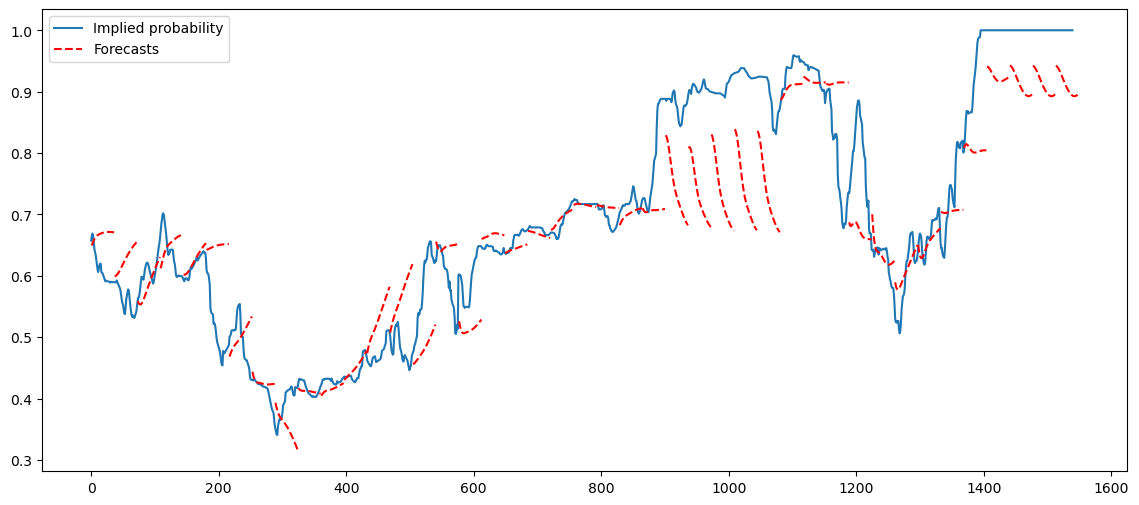

In [38]:
print('RMSE: ', results[0])
print('MAE: ', results[1])
forecasts_arr = np.array(forecasts)
forecasts_flat = forecasts_arr[:, :, 0, 0].flatten()
print(forecasts_arr.shape)
print(forecasts_flat.shape)
df_preds = pd.DataFrame({'Predictions': forecasts_flat}).shift(1)
plt.figure(figsize=(14,6))
plt.plot(test_y[:,0])
i = 0
idx = 0

while idx + forecast_window <= test_x.shape[0]:
     idx = forecast_window * i + 1
     s_pred = df_preds.iloc[idx:idx + forecast_window]
     plt.plot(s_pred, '--', color='red')
     i += 1

plt.legend(['Implied probability', 'Forecasts'])
plt.savefig('Figures/cv_forecast.png')

0            NaN
36      0.670827
72      0.655650
108     0.630509
144     0.667205
180     0.653186
216     0.651799
252     0.533819
288     0.424141
324     0.315845
360     0.408082
396     0.425258
432     0.477848
468     0.582230
504     0.618990
540     0.520570
576     0.651865
612     0.528821
648     0.666020
684     0.651203
720     0.661612
756     0.708122
792     0.712138
828     0.710538
864     0.710110
900     0.708871
936     0.682367
972     0.679249
1008    0.673511
1044    0.674119
1080    0.671044
1116    0.912775
1152    0.915074
1188    0.914866
1224    0.659428
1260    0.625022
1296    0.650039
1332    0.677423
1368    0.707658
1404    0.804602
1440    0.923609
1476    0.896095
1512    0.896119
Name: Predictions, dtype: float32
Mean absolute error of last forecast observation:  0.08817009635543174
Mean squared error of last forecast observation:  0.013106980617002247
Root mean squared error of last forecast observation:  0.1144857223281674


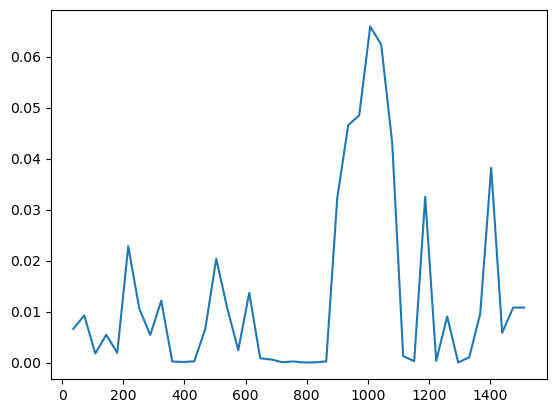

In [35]:
pred_length = test_y.shape[0]
print(df_preds['Predictions'].iloc[:pred_length:36])
df_scores = pd.DataFrame({'Forecasts': df_preds['Predictions'].iloc[:pred_length:36], 'Actual': test_y[1::36,0]})
df_scores['absolute error'] = abs(df_scores['Actual'] - df_scores['Forecasts'])
df_scores['squared error'] = df_scores['absolute error']**(2)
print('Mean absolute error of last forecast observation: ', df_scores['absolute error'].mean())
print('Mean squared error of last forecast observation: ', df_scores['squared error'].mean())
print('Root mean squared error of last forecast observation: ', np.sqrt(df_scores['squared error'].mean()))
plt.plot(df_scores['squared error'])

In [33]:
# print('RMSE: ', score)
# actual_odds = actual.reshape((actual.shape[0]*actual.shape[1]))
# predicted_odds = predicted.reshape((predicted.shape[0]*predicted.shape[1]))
# df_pred = pd.DataFrame({'pred':predicted_odds})
# plt.figure(figsize=(14,6))
# plt.plot(actual_odds)
# for i in range(predicted.shape[0]):
#     idx = 60 * i
#     s_pred = df_pred.iloc[idx:idx + 60]
#     plt.plot(s_pred, '--', color='red')

In [34]:
# plt.figure(figsize=(14,6))
# plt.plot(scores, '-o')